In [27]:
import mne
import numpy as np

In [28]:
raw = mne.io.read_raw_edf(r'data\SN001.edf', preload=True)
raw

Extracting EDF parameters from c:\Users\ayvazquez\aylin\BCI_UNL_AllisonPeterson_course\final_course_project\data\SN001.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


C:\Users\ayvazquez\AppData\Local\Temp\ipykernel_14876\1415096980.py:1: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(r'data\SN001.edf', preload=True)
C:\Users\ayvazquez\AppData\Local\Temp\ipykernel_14876\1415096980.py:1: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(r'data\SN001.edf', preload=True)


Reading 0 ... 6566399  =      0.000 ... 25649.996 secs...


<RawEDF | SN001.edf, 8 x 6566400 (25650.0 s), ~400.8 MB, data loaded>

In [19]:
raw.info['ch_names'][0]

'EEG F4-M1'

In [7]:
raw.info['sfreq']

256.0

In [17]:
np.random.randn(20, 3).shape

(20, 3)

In [18]:
np.array([raw.get_data()[0][:int(raw.info['sfreq']*30)],raw.get_data()[1][:int(raw.info['sfreq']*30)]]).T.shape

(7680, 2)

In [51]:
df.columns

Index(['Date', 'Time', 'Recording onset', 'Duration', 'Annotation',
       'Linked channel'],
      dtype='object')

## Sleep stages

In [81]:
import pandas as pd
import yasa
from matplotlib import pyplot as plt

In [82]:
def read_scoring_file(file_path):
    df = pd.read_csv(file_path, sep=', ')
    df['Annotation'] = df['Annotation'].str.rstrip(',')
    return df

def correct_stage(stg):
    if stg == 'W':
        stg_corrected = 0
    elif stg == 'N1':
        stg_corrected = 1
    elif stg == 'N2':
        stg_corrected = 2
    elif stg == 'N3':
        stg_corrected = 3
    elif stg == 'R':
        stg_corrected = 4
    else:
        stg_corrected = 'problem'
    return stg_corrected

def get_scoring(df):
    all_stages = ['W', 'N1', 'N2', 'N3', 'R']
    stages = df['Annotation'].apply(lambda x: x.split()[-1]).tolist()
    stages = [correct_stage(i) for i in stages if i in all_stages]
    return stages

C:\Users\ayvazquez\AppData\Local\Temp\ipykernel_14876\2151287796.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv(file_path, sep=', ')
c:\Users\ayvazquez\aylin\BCI_UNL_AllisonPeterson_course\.venv\lib\site-packages\yasa\plotting.py:89: FutureWarning: 'S' is deprecated and will be removed in a future version. Please use 's' instead of 'S'.
  freq_str = pd.tseries.frequencies.to_offset(pd.Timedelta(1 / sf_hypno, "S")).freqstr


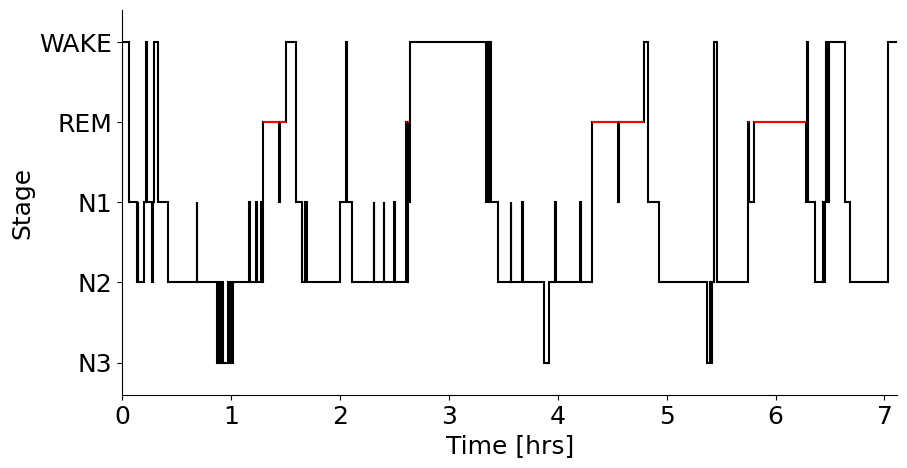

C:\Users\ayvazquez\AppData\Local\Temp\ipykernel_14876\2151287796.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv(file_path, sep=', ')
c:\Users\ayvazquez\aylin\BCI_UNL_AllisonPeterson_course\.venv\lib\site-packages\yasa\plotting.py:89: FutureWarning: 'S' is deprecated and will be removed in a future version. Please use 's' instead of 'S'.
  freq_str = pd.tseries.frequencies.to_offset(pd.Timedelta(1 / sf_hypno, "S")).freqstr


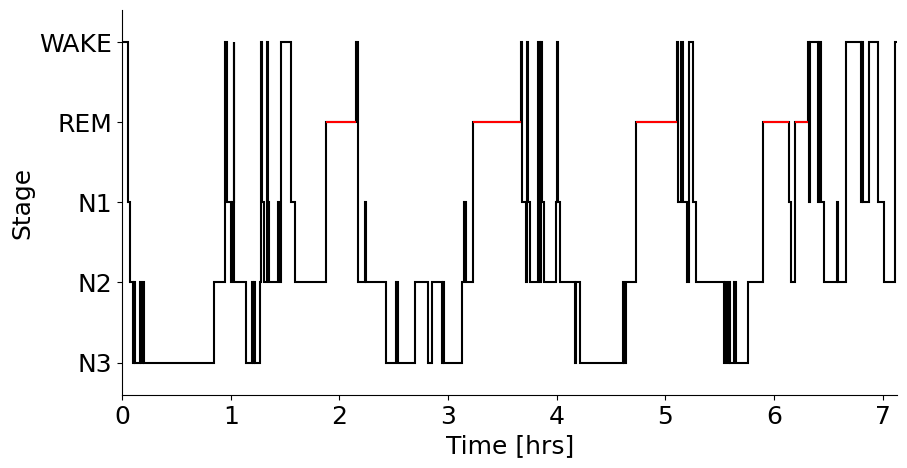

C:\Users\ayvazquez\AppData\Local\Temp\ipykernel_14876\2151287796.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv(file_path, sep=', ')
c:\Users\ayvazquez\aylin\BCI_UNL_AllisonPeterson_course\.venv\lib\site-packages\yasa\plotting.py:89: FutureWarning: 'S' is deprecated and will be removed in a future version. Please use 's' instead of 'S'.
  freq_str = pd.tseries.frequencies.to_offset(pd.Timedelta(1 / sf_hypno, "S")).freqstr


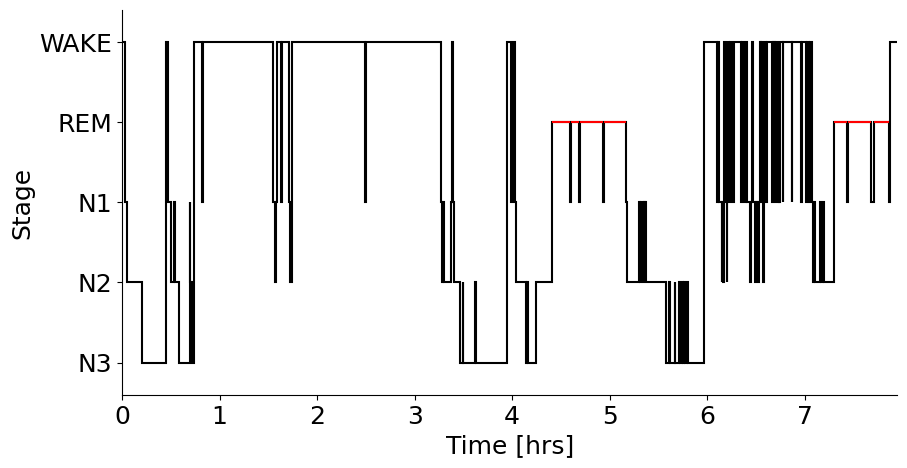

C:\Users\ayvazquez\AppData\Local\Temp\ipykernel_14876\2151287796.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv(file_path, sep=', ')
c:\Users\ayvazquez\aylin\BCI_UNL_AllisonPeterson_course\.venv\lib\site-packages\yasa\plotting.py:89: FutureWarning: 'S' is deprecated and will be removed in a future version. Please use 's' instead of 'S'.
  freq_str = pd.tseries.frequencies.to_offset(pd.Timedelta(1 / sf_hypno, "S")).freqstr


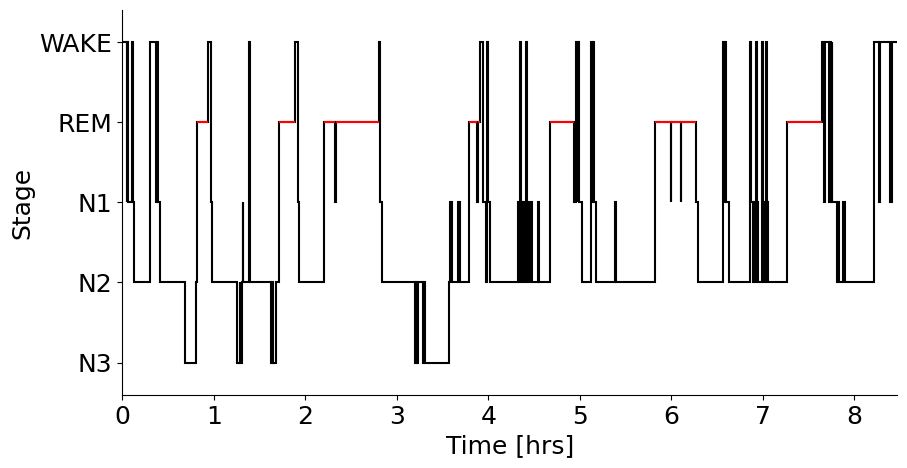

In [83]:
files_path = [r'data\SN001_sleepscoring.txt',
             r'data\SN002_sleepscoring.txt',
             r'data\SN003_sleepscoring.txt',
             r'data\SN004_sleepscoring.txt']

for file_path in files_path:
    df = read_scoring_file(file_path)
    stages = get_scoring(df)
    plt.figure(figsize=(10,5))
    yasa.plot_hypnogram(stages)
    plt.show()

In [78]:
plt.figure(figsize=(10,5))
yasa.plot_hypnogram(stages)